In [52]:
import time
n = 2
costArray = [None]*3
completeArray = [None]*3
timeArray = [None]*3
Resolution = [None]*n
heuristic =[None]*n
Resolution[0] = {'S': [['A', 1], ['B', 5], ['C', 8]],
        'A': [['S', 1], ['D', 3], ['E', 7], ['G', 9]],
        'B': [['S', 5], ['G', 4]],
        'C': [['S', 8], ['G', 5]],
        'D': [['A', 3]],
        'E': [['A', 7]],
        'G': [['A',9],['B',4],['C',5]]}

Resolution[1] = {'S': [['A', 1], ['B', 2]],
         'A': [['S', 1]],
         'B': [['S', 2], ['C', 3], ['D', 4]],
         'C': [['B', 2], ['E', 5], ['F', 6]],
         'D': [['B', 4], ['G', 7]],
         'E': [['C', 5]],
         'F': [['C', 6]],
         'G': [['D',4]]}

heuristic[0] = {'S': 8, 'A': 8, 'B': 4, 'C': 3, 'D': 5000, 'E': 5000, 'G': 0}
heuristic[1] = {'S': 0, 'A': 5000, 'B': 2, 'C': 3, 'D': 4, 'E': 5000, 'F': 5000, 'G': 0}

# total cost for nodes visited
cost = {'S': 0}             


def AStarSearch(j):
    global Resolution, heuristic
    closed = []             
    opened = [['S', heuristic[j]['S']]]     

    #finding the visited nodes
    while True:
        optimal_cost = 0
          # fn = f(n) = g(n) + h(n)
        fn = [i[1] for i in opened]   
        chosen_index = fn.index(min(fn))
        node = opened[chosen_index][0]  # current node
        closed.append(opened[chosen_index])
        del opened[chosen_index]
        if closed[-1][0] == 'G':       
            break
        for item in Resolution[j][node]:
            if item[0] in [closed_item[0] for closed_item in closed]:
                continue
                # adding nodes to cost dictionary
            cost.update({item[0]: cost[node] + item[1]})   
              # calculating f(n) of current node
            fn_node = cost[node] + heuristic[j][item[0]] + item[1]   
            temp = [item[0], fn_node]
             # storing f(n) of current node in array opened
            opened.append(temp)                                    

    #finding optimal sequence
    trace_node = 'G'                       
    optimal_sequence = ['G']                
    for i in range(len(closed)-2, -1, -1):
          # current node
        check_node = closed[i][0]         
        if trace_node in [children[0] for children in Resolution[j][check_node]]:
            children_costs = [temp[1] for temp in Resolution[j][check_node]]
            children_nodes = [temp[0] for temp in Resolution[j][check_node]]
            
            '''check whether h(s) + g(s) = f(s). If so, append current node to optimal sequence
            change the correct optimal tracing node to current node'''
            if cost[check_node] + children_costs[children_nodes.index(trace_node)] == cost[trace_node]:
                optimal_sequence.append(check_node)
                optimal_cost += children_costs[children_nodes.index(trace_node)]
                trace_node = check_node
                
    optimal_sequence.reverse()             

    return closed, optimal_sequence,optimal_cost

#Initialising arrays for outputs
visitedNodes = [None]*n
optimalNodes = [None]*n
cost1 = [None]*n

begin = time.time()
for j in range(0,n):
    if __name__ == '__main__':
        totalCost = 0
        visitedNodes[j], optimalNodes[j],cost1[j] = AStarSearch(j)
        print('visited nodes of '+str(j+1)+' : ' + str(visitedNodes[j]))
        for i in visitedNodes[j]:
            totalCost += i[1]
        print('Total Cost to find the path ' + str(j) + ' is ' + str(totalCost))
        print('optimal nodes sequence of '+ str(j) +' :'+ str(optimalNodes[j]))
        print('Cost of Resolution ' +str(j+1) + ' is: '+str(cost1[j]))
j = cost1.index(min(cost1))
print('The Resolution with the optimal solution is --Resolution' + str(j+1) +'---. With optimal cost of : ' + str(cost1[j]))
print('Most optimal path is : ' + str(optimalNodes[j]))
end = time.time()
print('time taken = '+str(end-begin))

visited nodes of 1 : [['S', 8], ['A', 9], ['B', 9], ['G', 9]]
Total Cost to find the path 0 is 35
optimal nodes sequence of 0 :['S', 'B', 'G']
Cost of Resolution 1 is: 9
visited nodes of 2 : [['S', 0], ['B', 4], ['C', 8], ['D', 10], ['G', 13]]
Total Cost to find the path 1 is 35
optimal nodes sequence of 1 :['S', 'B', 'D', 'G']
Cost of Resolution 2 is: 13
The Resolution with the optimal solution is --Resolution1---. With optimal cost of : 9
Most optimal path is : ['S', 'B', 'G']
time taken = 0.0009980201721191406


In [53]:
begin = time.time()
if __name__ == '__main__':
    totalCost = 0
    visitedNodes[j], optimalNodes[j],cost1[j] = AStarSearch(j)
    print('visited nodes of '+str(j+1)+' : ' + str(visitedNodes[j]))
    for i in visitedNodes[j]:
        totalCost += i[1]
    print('Total Cost to find the path ' + str(j) + ' is ' + str(totalCost))
    costArray[0] = totalCost
    completeArray[0] = 1
    print('optimal nodes sequence of '+ str(j) +' :'+ str(optimalNodes[j]))
    print('Optimal Cost ' +str(j+1) + ' is: '+str(cost1[j]))

# print('The Resolution with the optimal solution is --Resolution' + str(j+1) +'---. With optimal cost of : ' + str(cost1[j]))
# print('Most optimal path is : ' + str(optimalNodes[j]))##############################3
end = time.time()
timeArray[0] = end-begin
print('time taken = '+str(end-begin))

visited nodes of 1 : [['S', 8], ['A', 9], ['B', 9], ['G', 9]]
Total Cost to find the path 0 is 35
optimal nodes sequence of 0 :['S', 'B', 'G']
Optimal Cost 1 is: 9
time taken = 0.0009899139404296875


In [119]:
begin = time.time()
visited = [] # List for visited nodes.
queue = []     #Initialize a queue

def bfs(visited, Resolution, node): #function for BFS
    visited.append(node)
    queue.append(node)
    costbfs = 0
    while queue:          # Creating loop to visit each node
        m = queue.pop(0) 
        print (m, end = " ") 
    
        for neighbour in Resolution[m]:
            if neighbour[0] not in visited:
                visited.append(neighbour[0])
                queue.append(neighbour[0])
                costbfs += neighbour[1]
                if neighbour[0] == 'G':
                    break
    return cost         

# Driver Code
print("Following is the Breadth-First Search")
costbfs = bfs(visited, Resolution[0], 'S') 
costArray[1] = costbfs
#completeArray[1] = 1
end = time.time()
timeArray[1] = end-begin
print('Total Cost to reach the solution is :' + str(costbfs))

Following is the Breadth-First Search
S A B G Total Cost to reach the solution is :{'S': 0, 'A': 2, 'B': 2, 'C': 5, 'D': 6, 'E': 10, 'G': 4, 'F': 11}


In [105]:
begin = time.time()
visited = set()
found = [0,0]

def dfs(visited,graph,root,found):
    
    if root not in visited:
        #print(root+ ' ',end=" ")
        visited.add(root)
        for neighbor in graph[root]:
           
            found[1] = found[1] + neighbor[1]
           
            if neighbor[0] == 'G':
              
                found[0] = 1
                return found
            else:
                
                found = dfs(visited,graph,neighbor[0],found)
                if(found[0] == 1):
                    break
    return found
              
found = dfs(visited,Resolution[0],'S',found)
costArray[2] = found[1]
#completeArray[2] = 1
end = time.time()
timeArray[2] = end - begin
print('Cost of the search is : ' + str(found[1]) + ' time ' + str(timeArray[2]))

Cost of the search is : 6 time 0.0009982585906982422


In [106]:
n = 1
begin = time.time()
costArray1 = [None]*3
completeArray1 = [None]*3
timeArray1 = [None]*3
Resolution[0] = {'S': [['A', 1], ['B', 2]],
         'A': [['S', 1]],
         'B': [['S', 2], ['C', 3], ['D', 4]],
         'C': [['B', 2], ['E', 5], ['F', 6]],
         'D': [['B', 4], ['G', 7]],
         'E': [['C', 5]],
         'F': [['C', 6]],
        'G': [['D',4]]}
heuristic[0] = {'S': 0, 'A': 5000, 'B': 2, 'C': 3, 'D': 4, 'E': 5000, 'F': 5000, 'G': 0}

if __name__ == '__main__':
    totalCost = 0
    visitedNodes[j], optimalNodes[j],cost1[j] = AStarSearch(j)
    print('visited nodes of '+str(j+1)+' : ' + str(visitedNodes[j]))
    for i in visitedNodes[j]:
        totalCost += i[1]
    print('Total Cost to find the path ' + str(j) + ' is ' + str(totalCost))
    costArray1[0] = totalCost
    completeArray1[0] = 1
    print('optimal nodes sequence of '+ str(j) +' :'+ str(optimalNodes[j]))
    print('Optimal Cost ' +str(j+1) + ' is: '+str(cost1[j]))

# print('The Resolution with the optimal solution is --Resolution' + str(j+1) +'---. With optimal cost of : ' + str(cost1[j]))
# print('Most optimal path is : ' + str(optimalNodes[j]))##############################3
end = time.time()
timeArray1[0] = end-begin
print('time taken = '+str(end-begin))

visited nodes of 1 : [['S', 0], ['B', 4], ['C', 8], ['D', 10], ['G', 13]]
Total Cost to find the path 0 is 35
optimal nodes sequence of 0 :['S', 'B', 'D', 'G']
Optimal Cost 1 is: 13
time taken = 0.0009615421295166016


In [107]:
visited = [] # List for visited nodes.
queue = []     #Initialize a queue
print("Following is the Breadth-First Search")
costbfs = bfs(visited, Resolution[0], 'S') 
costArray1[1] = costbfs
completeArray1[1] = 1
#end = time.time()
timeArray1[1] = end-begin
print('Total Cost to reach the solution is :' + str(costbfs))

Following is the Breadth-First Search
S A B C D E F G Total Cost to reach the solution is :{'S': 0, 'A': 1, 'B': 2, 'C': 5, 'D': 6, 'E': 10, 'G': 13, 'F': 11}


In [108]:
visited = set()
found = [0,0]
found = dfs(visited,Resolution[0],'S',found)
costArray1[1] = found[1]
completeArray1[1] = 1
#end = time.time()
timeArray1[2] = end - begin
print('Cost of the search is : ' + str(found[1]))

Cost of the search is : 48


In [109]:
Resolution[0] = {'S': [['A', 2], ['B', 2]],
         'A': [['S', 2],['G',2]],
         'B': [['S', 2], ['G', 2]],
        'G': [['A',2],['B',2]]}
heuristic[0] = {'S': 0, 'A': 1, 'B': 1,'G': 0}
n = 1
costArray2 = [None]*3
completeArray2 = [None]*3
timeArray2 = [None]*3

In [110]:
begin = time.time()
if __name__ == '__main__':
    
    totalCost = 0
    visitedNodes[j], optimalNodes[j],cost1[j] = AStarSearch(j)
    print('visited nodes of '+str(j+1)+' : ' + str(visitedNodes[j]))
    for i in visitedNodes[j]:
        totalCost += i[1]
    print('Total Cost to find the path ' + str(j) + ' is ' + str(totalCost))
    costArray2[0] = totalCost
    completeArray2[0] = 1
    print('optimal nodes sequence of '+ str(j) +' :'+ str(optimalNodes[j]))
    print('Optimal Cost ' +str(j+1) + ' is: '+str(cost1[j]))

# print('The Resolution with the optimal solution is --Resolution' + str(j+1) +'---. With optimal cost of : ' + str(cost1[j]))
# print('Most optimal path is : ' + str(optimalNodes[j]))##############################3
end = time.time()
timeArray2[0] = end-begin
print('time taken = '+str(end-begin))

visited nodes of 1 : [['S', 0], ['A', 3], ['B', 3], ['G', 4]]
Total Cost to find the path 0 is 10
optimal nodes sequence of 0 :['S', 'B', 'G']
Optimal Cost 1 is: 4
time taken = 0.001954793930053711


In [111]:
visited = [] # List for visited nodes.
queue = []     #Initialize a queue
print("Following is the Breadth-First Search")
costbfs = bfs(visited, Resolution[0], 'S') 
costArray2[1] = costbfs
completeArray2[1] = 1
#end = time.time()
timeArray2[1] = end-begin
print('Total Cost to reach the solution is :' + str(costbfs))

Following is the Breadth-First Search
S A B G Total Cost to reach the solution is :{'S': 0, 'A': 2, 'B': 2, 'C': 5, 'D': 6, 'E': 10, 'G': 4, 'F': 11}


In [112]:
type(costArray[1])

dict

In [113]:
visited = set()
found = [0,0]
found = dfs(visited,Resolution[0],'S',found)
costArray2[1] = found[1]
completeArray2 = 1
#end = time.time()
timeArray2[2] = end - begin
print('Cost of the search is : ' + str(found[1]))

Cost of the search is : 6


In [114]:

timeArray



[0.0009899139404296875, 0.0010333061218261719, 0.0009982585906982422]

In [115]:
costArray

[35, {'S': 0, 'A': 2, 'B': 2, 'C': 5, 'D': 6, 'E': 10, 'G': 4, 'F': 11}, 6]

In [116]:
timeArray2

[0.001954793930053711, 0.001954793930053711, 0.001954793930053711]

TypeError: unsupported operand type(s) for +: 'int' and 'dict'

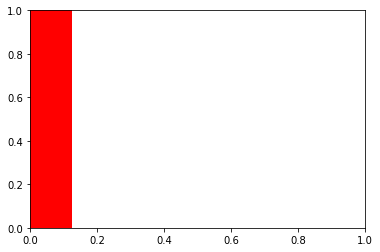

In [99]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
ind = np.arange(N)
width = 0.25


bar1 = plt.bar(ind, costArray, width, color = 'r')

yvals = [10, 20, 30]
bar2 = plt.bar(ind+width, completeArray, width, color='g')

zvals = [11, 12, 13]
bar3 = plt.bar(ind+width*2, timeArray, width, color = 'b')

plt.xlabel("Dates")
plt.ylabel('Scores')
plt.title("Players Score")

plt.xticks(ind+width,['MRA', 'BFS', 'A*'])
plt.legend( (bar1, bar2, bar3), ('Cost of Search', 'Completeness', 'Time Taken') )
plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

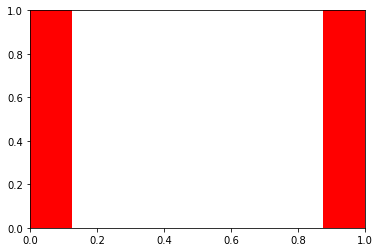

In [71]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
ind = np.arange(N)
width = 0.25

xvals = [costArray[0],costArray[1], costArray[2]]
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = [ completeArray[0],  completeArray[1], completeArray[2]]
bar2 = plt.bar(ind+width, yvals, width, color='g')

zvals = [timeArray[0], timeArray[1], timeArray[2]]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Dates")
plt.ylabel('Scores')
plt.title("Players Score")

plt.xticks(ind+width,['2021Feb01', '2021Feb02', '2021Feb03'])
plt.legend( (bar1, bar2, bar3), ('Player1', 'Player2', 'Player3') )
plt.show()